In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

<AxesSubplot: xlabel='date'>

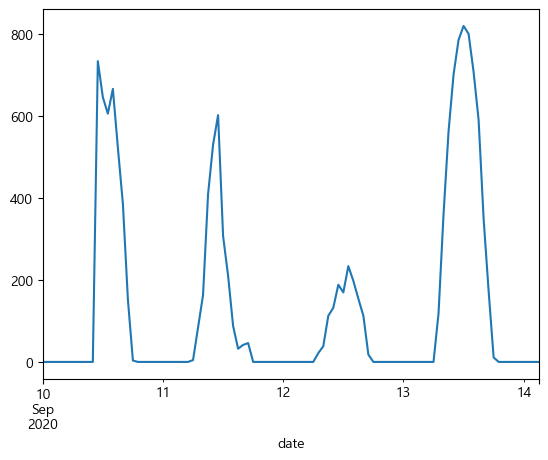

In [6]:
solar_eda.target[:100].plot()

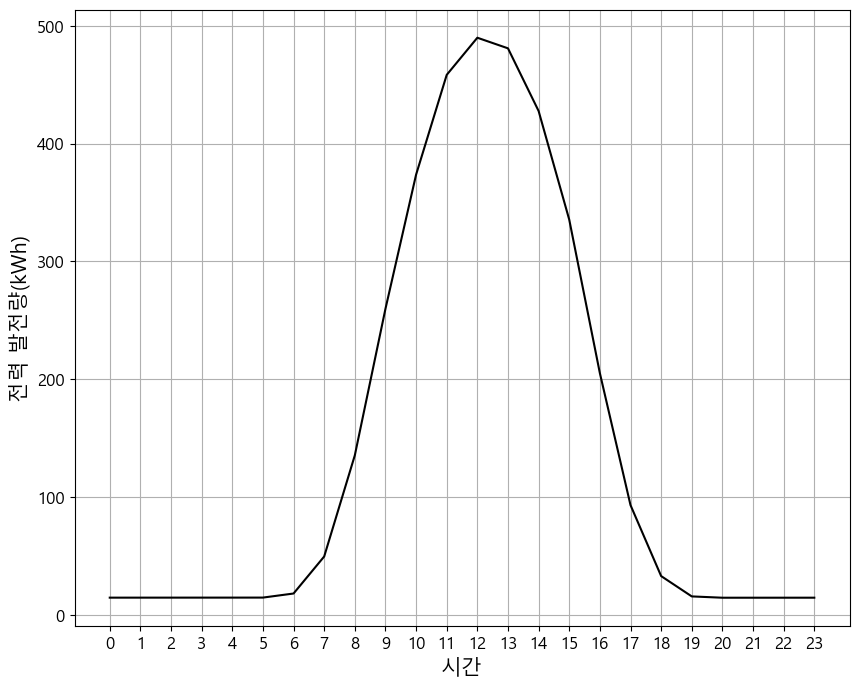

In [7]:
ee = solar.groupby(['hour']).mean().target
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [8]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [9]:
df.date_time = pd.to_datetime(df.date_time)

In [10]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [11]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [12]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [01:20<00:00, 1518.99it/s]


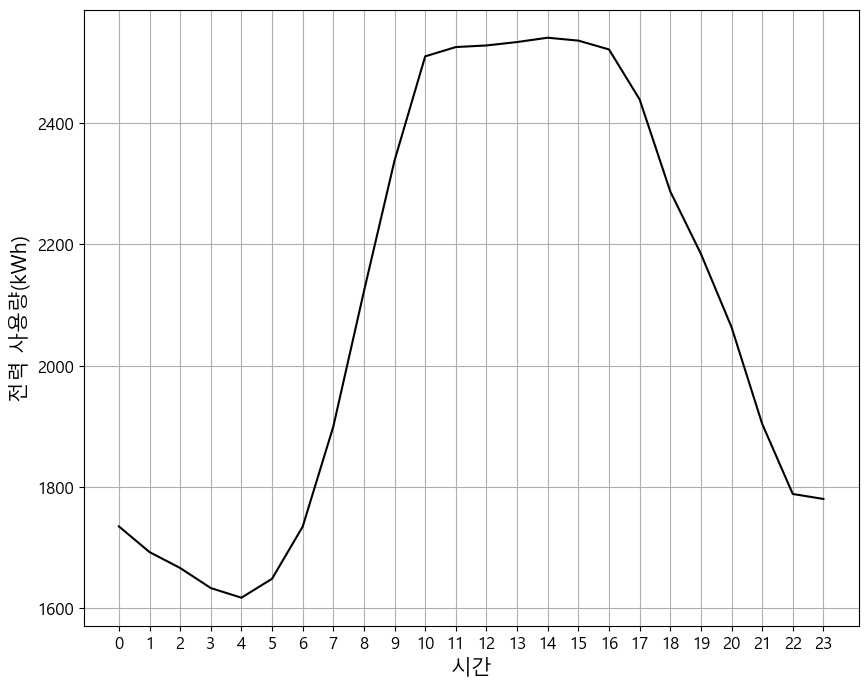

In [13]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [18]:
time = [9, 10, 16, 17, 18, 19]

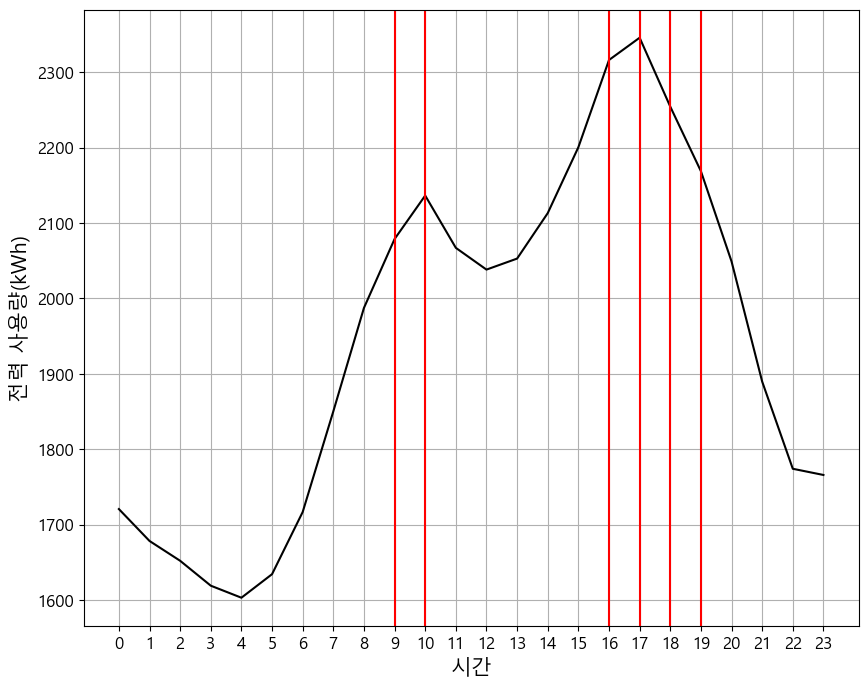

In [19]:
plt.figure(figsize=(10,8))
plt.plot(qq - ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time:
    plt.axvline(i, color = 'r')
plt.show()